# Practical 00 - Introduction to EDA

# Ashish Vishnu (20MDT1005)

In [67]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [68]:
df_canada = pd.read_excel("C:/DATA/Fallsem-2021/MVA/data/MigFlow_All_Countries/Canada.xlsx",
                         sheet_name="Canada by Citizenship",
                         skiprows=range(20),
                         skipfooter=2)
df_canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [69]:
df_canada.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 43 entries, Type to 2013
dtypes: int64(37), object(6)
memory usage: 65.6+ KB


In [70]:
df_canada.shape

(195, 43)

In [71]:
df_canada.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [72]:
df_canada.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True) #dropping columns
df_canada.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [73]:
df_canada.rename(columns ={'OdName':'country','AreaName':'Continent','RegName':'Region'}, inplace=True) #renaming columns
df_canada.columns

Index([  'country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [74]:
df_canada.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1190.169231,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,3710.505369,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,19.000000,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,191.000000,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,756.500000,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,36619.000000,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000


In [75]:
df_canada.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
1980,195.0,508.394872,1949.588546,0.0,0.0,13.0,251.5,22045.0
1981,195.0,566.989744,2152.643752,0.0,0.0,10.0,295.5,24796.0
1982,195.0,534.723077,1866.997511,0.0,0.0,11.0,275.0,20620.0
1983,195.0,387.435897,1204.333597,0.0,0.0,12.0,173.0,10015.0
1984,195.0,376.497436,1198.246371,0.0,0.0,13.0,181.0,10170.0
1985,195.0,358.861538,1079.309600,0.0,0.0,17.0,197.0,9564.0
1986,195.0,441.271795,1225.576630,0.0,0.5,18.0,254.0,9470.0
1987,195.0,691.133333,2109.205607,0.0,0.5,26.0,434.0,21337.0
1988,195.0,714.389744,2443.606788,0.0,1.0,34.0,409.0,27359.0
1989,195.0,843.241026,2555.048874,0.0,1.0,44.0,508.5,23795.0


In [76]:
df_canada.set_index('country', inplace=True)
df_canada.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [77]:
df_canada.index.name = None

In [78]:
df_canada.loc['India']

Continent                  Asia
Region            Southern Asia
DevName      Developing regions
1980                       8880
1981                       8670
1982                       8147
1983                       7338
1984                       5704
1985                       4211
1986                       7150
1987                      10189
1988                      11522
1989                      10343
1990                      12041
1991                      13734
1992                      13673
1993                      21496
1994                      18620
1995                      18489
1996                      23859
1997                      22268
1998                      17241
1999                      18974
2000                      28572
2001                      31223
2002                      31889
2003                      27155
2004                      28235
2005                      36210
2006                      33848
2007                      28742
2008    

In [79]:
df_canada.iloc[79] #using iloc

Continent                  Asia
Region            Southern Asia
DevName      Developing regions
1980                       8880
1981                       8670
1982                       8147
1983                       7338
1984                       5704
1985                       4211
1986                       7150
1987                      10189
1988                      11522
1989                      10343
1990                      12041
1991                      13734
1992                      13673
1993                      21496
1994                      18620
1995                      18489
1996                      23859
1997                      22268
1998                      17241
1999                      18974
2000                      28572
2001                      31223
2002                      31889
2003                      27155
2004                      28235
2005                      36210
2006                      33848
2007                      28742
2008    

In [80]:
df_canada[df_canada.index=='India'][range(2000,2013)]

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
India,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933


In [81]:
df_canada['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Oceania',
       'Latin America and the Caribbean', 'Northern America'],
      dtype=object)

In [82]:
df_canada[df_canada['Continent'] == 'Asia']

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,147,224,218,198,205,267,252,236,258,207
Azerbaijan,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,230,359,236,203,125,165,209,138,161,57
Bahrain,Asia,Western Asia,Developing regions,0,2,1,1,1,3,0,...,12,12,12,22,9,35,28,21,39,32
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,2660,4171,4014,2897,2939,2104,4721,2694,2640,3789
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,1,5,10,7,36,865,1464,1879,1075,487
Brunei Darussalam,Asia,South-Eastern Asia,Developing regions,79,6,8,2,2,4,12,...,3,4,5,11,10,5,12,6,3,6
Cambodia,Asia,South-Eastern Asia,Developing regions,12,19,26,33,10,7,8,...,348,370,529,460,354,203,200,196,233,288
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
"China, Hong Kong Special Administrative Region",Asia,Eastern Asia,Developing regions,0,0,0,0,0,0,0,...,536,729,712,674,897,657,623,591,728,774


In [83]:
con = df_canada.groupby('Continent')
for group in con:
    print("Name of group:",group[0])
    print("\n")
    print("Group data:\n",group[1].shape)
    

Name of group: Africa


Group data:
 (54, 37)
Name of group: Asia


Group data:
 (49, 37)
Name of group: Europe


Group data:
 (43, 37)
Name of group: Latin America and the Caribbean


Group data:
 (33, 37)
Name of group: Northern America


Group data:
 (2, 37)
Name of group: Oceania


Group data:
 (14, 37)


In [84]:
only_new = df_canada[['Continent']+list(range(2000,2006))].groupby('Continent').sum()
only_new.head()

,2000,2001,2002,2003,2004,2005
Continent,,,,,,
Africa,20346,24292,22710,23366,28192,27523
Asia,134544,148083,137653,131769,134850,159253
Europe,38215,42779,36798,34556,38082,35955
Latin America and the Caribbean,16898,20067,19317,20263,22181,24747
Northern America,5433,5604,4948,5543,6990,8394


<AxesSubplot:>

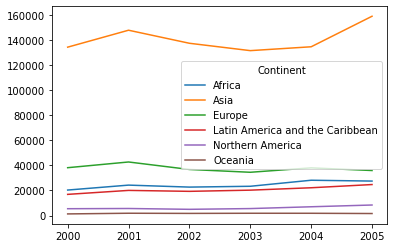

In [85]:
only_new.transpose().plot(kind="line")

<AxesSubplot:>

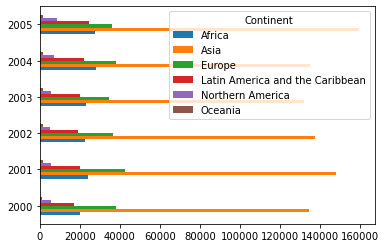

In [86]:
only_new.transpose().plot(kind="barh")

<AxesSubplot:>

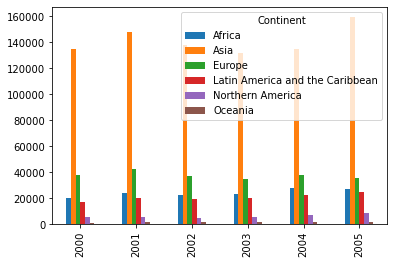

In [87]:
only_new.transpose().plot(kind="bar")